In [87]:
%matplotlib inline
import pandas as pd
import numpy as np
df = pd.read_csv('2012-18_playerBoxScore_diff.csv')

In [88]:
df.describe(include='all')

,playDispNm,teamConfIsEast,opptConfIsEast,teamRsltIsWin,opptRsltltIsWin,teamLocIsHome,opptLocIsHome,playPos_C,playPos_F,playPos_G,...,playBIs_quarter_end_diff,playBIs_quarter_start_diff,playBIs_year_end_diff,playBIs_year_start_diff,playBElapsed_diff,IsStarter_diff,age_diff,Seats_diff,Year_Open_diff,pre_gm_miles_diff
count,154014,154014.000000,154014.000000,154014.000000,154014.000000,154014.0,154014.0,154014.000000,154014.000000,154014.000000,...,154014.000000,154014.0,154014.0,154014.0,1.540140e+05,154014.000000,154014.000000,154014.000000,154014.000000,154014.000000
unique,895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Corey Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.496254,0.499435,0.591686,0.408314,1.0,0.0,0.161362,0.001078,0.000649,...,0.000006,0.0,0.0,0.0,5.334435e+03,0.000299,0.016921,-0.065371,-0.006181,0.717831
std,NaN,0.499988,0.500001,0.491523,0.491523,0.0,0.0,0.367866,0.032813,0.025473,...,0.004413,0.0,0.0,0.0,3.285570e+06,0.277290,5.648814,1043.351441,11.388362,1908.082306
min,NaN,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,...,-1.000000,0.0,0.0,0.0,-4.782240e+08,-1.000000,-22.000000,-4050.000000,-52.000000,-8990.043545
25%,NaN,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.000000,-4.000000,-10.000000,0.000000,-415.240402
50%,NaN,0.000000,0.000000,1.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,1.000000,1.000000,1.000000,1.000000,1.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.000000,4.000000,0.000000,0.000000,416.090242


In [101]:
target = 'playMin_diff'

In [89]:
feature_names = df.drop([target,'playDispNm'], axis=1)
feature_names = list(feature_names.columns)

In [90]:
X = np.array(df.drop([target,'playDispNm'], axis=1))
y = np.array(df[target'])

## 1 Feature importances

In [91]:
from sklearn.model_selection import train_test_split

X_train, X, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [92]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 40, max_features='log2', min_samples_leaf=8).fit(X_train, y_train)

In [93]:
rfr.score(X_val, y_val)

0.24119862582377483

In [94]:
importance_numbers = rfr.feature_importances_

In [95]:
importance_list = importance_numbers.tolist()

In [96]:
importances = np.vstack((feature_names, importance_list))

In [97]:
importances = pd.Series(importance_list, index = feature_names)

In [98]:
importances.sort_values(ascending=False)[:10]

IsStarter_diff       0.131526
playFG%_diff         0.121523
playFT%_diff         0.112653
play2P%_diff         0.092650
play3P%_diff         0.067414
age_diff             0.040609
pre_gm_miles_diff    0.036442
gmElapsed_diff       0.028986
gmDayofyear_diff     0.027800
gmDay_diff           0.027701
dtype: float64

In [99]:
importances = ['IsStarter_diff','playFG%_diff','playFT%_diff','play2P%_diff','play3P%_diff','age_diff','pre_gm_miles_diff']

In [100]:
df_X_train = pd.DataFrame(X_train, columns=feature_names)
X_val = pd.DataFrame(X_val, columns=feature_names)

In [102]:
df_y_train = pd.DataFrame(y_train, columns=[target])

In [103]:
y_importances_train = df_y_train

In [104]:
y_importances_train = df_y_train

In [105]:
X_importances_train = df_X_train[importances]

In [106]:
X_val_importances = X_val[importances]

In [107]:
X_importances_train.shape

(98568, 7)

In [108]:
X_val_importances.shape

(24643, 7)

In [109]:
rfr_importances = RandomForestRegressor(n_estimators = 40, max_features='log2', min_samples_leaf=8).fit(X_importances_train, y_importances_train)

/Users/jz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [110]:
rfr_importances.score(X_val_importances, y_val)

0.24554690395968715

### An alternative mechanism

In [111]:
import eli5
from eli5.sklearn import PermutationImportance

In [112]:
%%time
perm = PermutationImportance(rfr).fit(X_val, y_val)

CPU times: user 1min 3s, sys: 171 ms, total: 1min 3s
Wall time: 1min 3s


In [113]:
eli5.explain_weights_df(perm, feature_names=feature_names).head(10)

,feature,weight,std
0,IsStarter_diff,0.092884,0.001854
1,playFT%_diff,0.084013,0.001411
2,play2P%_diff,0.063462,0.001863
3,playFG%_diff,0.062034,0.001623
4,play3P%_diff,0.060395,0.001361
5,next_gmDays_diff,0.013735,0.000348
6,age_diff,0.013714,0.000453
7,gmDayofyear_diff,0.013206,0.000324
8,pre_gmDays_diff,0.013158,0.000386
9,gmElapsed_diff,0.012806,0.000572


In [114]:
from sklearn.feature_selection import SelectFromModel
first_selection = SelectFromModel(perm, threshold=0.01, prefit=True)
X_val_first_select = first_selection.transform(X_val)
X_train_first_select = first_selection.transform(X_train)

In [115]:
rfr_first_select = RandomForestRegressor(n_estimators=40, max_features='log2')
rfr_first_select.fit(X_train_first_select, y_train)
rfr_first_select.score(X_val_first_select, y_val)

0.607693762364605

In [116]:
first_selection.get_support()[:20]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [117]:
first_select_cols = df_X_train.columns[first_selection.get_support()]
first_select_cols[:5]

Index(['next_gmDays_diff', 'pre_gmDays_diff', 'teamDayOff_diff',
       'playFG%_diff', 'play2P%_diff'],
      dtype='object')

In [118]:
first_select_cols.shape

(13,)

In [119]:
from eli5.sklearn import PermutationImportance
second_pmi = PermutationImportance(rfr_first_select).fit(X_val_first_select, y_val)

In [120]:
eli5.explain_weights_df(second_pmi, top=5, feature_names = first_select_cols.to_list())

,feature,weight,std
0,play2P%_diff,0.362485,0.002337
1,playFT%_diff,0.349831,0.004538
2,playFG%_diff,0.341704,0.003260
3,play3P%_diff,0.318303,0.002866
4,IsStarter_diff,0.190735,0.003783


In [121]:
eli5.explain_weights_df(second_pmi, feature_names = first_select_cols.to_list()).tail(5)

,feature,weight,std
8,gmDayofweek_diff,0.090643,0.002133
9,gmDay_diff,0.085989,0.000617
10,gmElapsed_diff,0.082539,0.000596
11,teamDayOff_diff,0.082222,0.000899
12,gmDayofyear_diff,0.078742,0.001078


In [122]:
second_select = SelectFromModel(second_pmi, threshold=0.01, prefit=True)
X_train_second_select = second_select.transform(X_train_first_select)
X_val_second_select = second_select.transform(X_val_first_select)

rfr_second_select = RandomForestRegressor(n_estimators=40, max_features='log2')
rfr_second_select.fit(X_train_second_select, y_train)
rfr_second_select.score(X_val_second_select, y_val)

0.6095173423943303

In [123]:
third_pmi = PermutationImportance(rfr_second_select).fit(X_val_second_select, y_val)
third_select = SelectFromModel(third_pmi, threshold=0.01, prefit=True)

X_train_third_select = third_select.transform(X_train_second_select)
X_val_third_select = third_select.transform(X_val_second_select)

rfr = RandomForestRegressor(n_estimators=40, max_features='log2')
rfr.fit(X_train_third_select, y_train)
rfr.score(X_val_third_select, y_val)

0.6089019137094094

In [124]:
second_select_cols = first_select_cols[second_select.get_support()]
third_select_cols = second_select_cols[third_select.get_support()]
third_select_cols.shape

(13,)

In [139]:
eli5.explain_weights_df(third_pmi, feature_names = second_select_cols.to_list())[:13]

,feature,weight,std
0,play2P%_diff,0.361568,0.001393
1,playFT%_diff,0.359802,0.002391
2,playFG%_diff,0.352444,0.003742
3,play3P%_diff,0.314877,0.003121
4,IsStarter_diff,0.189586,0.004068
5,age_diff,0.150174,0.001040
6,next_gmDays_diff,0.118397,0.001565
7,gmDayofweek_diff,0.093415,0.001219
8,pre_gmDays_diff,0.090965,0.000846
9,teamDayOff_diff,0.083363,0.000995


In [126]:
selected_X_train = pd.DataFrame(X_train_third_select, columns=third_select_cols)
selected_X_train.loc[:, target] = y_train

selected_X_val = pd.DataFrame(X_val_third_select, columns=third_select_cols)
selected_X_val.loc[:, target] = y_val

## 2 Correlation Analysis

In [127]:
rfr = RandomForestRegressor(n_estimators=40, max_features='log2')
rfr.fit(selected_X_train, y_train)
rfr.score(selected_X_val, y_val)

0.9931358211804439

In [128]:
import numpy as np
indexed_corr = (np.abs(selected_X_train.corr(method = 'spearman')) > .60).sum()
correlated_cols = indexed_corr[indexed_corr > 1].index
correlated_cols

Index(['pre_gmDays_diff', 'teamDayOff_diff', 'playFG%_diff', 'play2P%_diff',
       'gmDayofyear_diff', 'gmElapsed_diff'],
      dtype='object')

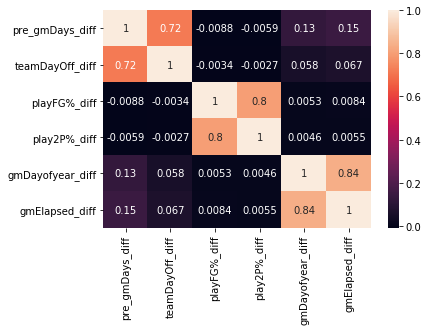

In [129]:
import seaborn as sns
df_corr = selected_X_train[correlated_cols].corr(method = 'spearman')
sns.heatmap(df_corr, annot = True)


From here we can identify those features that are highly correlated. The lighter the color, the higher the correlation.

1. playFG%_diff, play2P%_diff
2. gmDayofyear_diff, gmElapsed_diff
3. pre_gmDays_diff, teamDayOff_diff

If we try various permutations of removing one or more of our availability features, to see if we suffer a significant from from our original score of 0.9931

In [136]:
df_dropped_avail_train = selected_X_train.drop(columns = ['playFG%_diff','play2P%_diff'])
df_dropped_avail_val = selected_X_val.drop(columns = ['playFG%_diff','play2P%_diff'])

rfr_dropped_avail = RandomForestRegressor(n_estimators=40, max_features='log2')
rfr_dropped_avail.fit(df_dropped_avail_train, y_train)
rfr_dropped_avail.score(df_dropped_avail_val, y_val)

0.9968312098462012

In [137]:
df_dropped_avail_train = selected_X_train.drop(columns = ['gmDayofyear_diff','gmElapsed_diff'])
df_dropped_avail_val = selected_X_val.drop(columns = ['gmDayofyear_diff','gmElapsed_diff'])

rfr_dropped_avail = RandomForestRegressor(n_estimators=40, max_features='log2')
rfr_dropped_avail.fit(df_dropped_avail_train, y_train)
rfr_dropped_avail.score(df_dropped_avail_val, y_val)

0.9959913026722691

In [138]:
df_dropped_avail_train = selected_X_train.drop(columns = ['pre_gmDays_diff','teamDayOff_diff'])
df_dropped_avail_val = selected_X_val.drop(columns = ['pre_gmDays_diff','teamDayOff_diff'])

rfr_dropped_avail = RandomForestRegressor(n_estimators=40, max_features='log2')
rfr_dropped_avail.fit(df_dropped_avail_train, y_train)
rfr_dropped_avail.score(df_dropped_avail_val, y_val)

0.9962549837164385